In [35]:
%matplotlib inline
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
def load_dataset(path: Path) -> pd.DataFrame:
    df = pd.read_json(path)
    df.date = pd.to_datetime(df.date, format="%Y-%m-%d %H:%M:%S")
    df.set_index('date', inplace=True)
    return df


In [4]:
df = load_dataset("../datasets/Hydra-L.json")
df.head()


,BME280_temp,BME280_humidity,BME280_pressure
date,,,
2022-07-06 00:00:04,30.45,34.93,746.19
2022-07-06 00:00:29,30.55,34.55,745.17
2022-07-06 00:00:30,28.27,43.74,746.70
2022-07-06 00:00:32,30.62,35.08,746.40
2022-07-06 00:00:33,27.05,45.82,746.68


In [5]:
def effective_temperature(t: np.ndarray, h: np.ndarray) -> np.ndarray:
    return t - 0.4 * (t - 10) * (1 - h / 100)


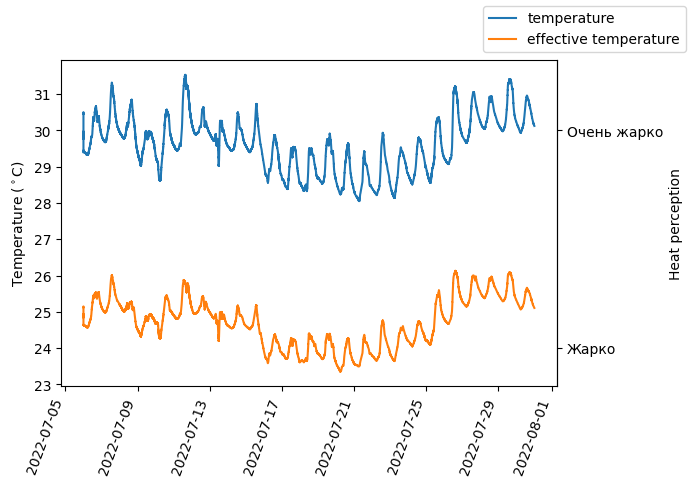

In [74]:
HEAT_PERCEPTION = {
    30: 'Очень жарко',
    24: 'Жарко',
    18: 'Тепло',
    12: 'Умеренно тепло',
    0: 'Холодно',
    -12: 'Очень холодно',
    -24: 'Крайне холодно',
    -30: 'Крайне холодно',
}


def plot_effective(t: np.ndarray, h: np.ndarray) -> None:
    fig, ax = plt.subplots()
    fig.autofmt_xdate(rotation=70)

    ax.plot(t, label='temperature')
    ax.plot(effective_temperature(t, h), label='effective temperature')
    ax.set_ylabel(r'Temperature ($^\circ$C)')

    ax2 = ax.secondary_yaxis('right')
    ax2.set_ylabel('Heat perception')
    ticks, labels = HEAT_PERCEPTION.keys(), HEAT_PERCEPTION.values()
    ax2.set_yticks(ticks=list(ticks), labels=list(labels))

    fig.legend()



df_mean = df.rolling('1h').mean()
plot_effective(df_mean.BME280_temp, df_mean.BME280_humidity)


In [76]:
d = load_dataset("../datasets/Паскаль.json")
p = np.polynomial.Polynomial.fit(df_mean.BME280_temp, d.weather_temp, 24 * 7 * 4)


TypeError: expected x and y to have same length

In [ ]:
p
